# Title: Mapping in R Lab
### Authors: Richard Johansen
### University of Cincinnati Libraries
### 4/18/2019

### REFERENCES:
Code: https://github.com/RAJohansen/UCL_Workshops/tree/master/Mapping_in_R
Data: www.gapminder.org/data/
Geocomputation in R: https://geocompr.robinlovelace.net/ 

## Step #1: Load required packages (These are just a few to get you started)

In [3]:
library(tidyverse)
library(tmap)
library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Linking to GEOS 3.5.1, GDAL 2.1.2, PROJ 4.9.3


## Step #2: Import spatial object (Shapefile)

In [5]:
shapefile <-  st_read("Data/us_states.shp")

Reading layer `us_states' from data source `/home/rstudio/Data/us_states.shp' using driver `ESRI Shapefile'
Simple feature collection with 50 features and 5 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: -124.7328 ymin: 25.1305 xmax: -66.96927 ymax: 49.37173
epsg (SRID):    4269
proj4string:    +proj=longlat +datum=NAD83 +no_defs


### Step 3: Import non-spatial data frame
__HINT:__ Use the "foreign" package and the "read.dbf" function to load the census dbf file

In [6]:
df <- foreign::read.dbf("Data/census.dbf") # Data from external source

### Step 4: Join spatial object and data frame
__Hint:__ Just like in ArcGIS the join fields have to be identical
If they don't share a common field name, you must create one.

In [7]:
#df$join_name <- df$name
df$ST_FIPS <- df$STATE_FIPS

In [8]:
States_Census <- merge(shapefile,df, by = "ST_FIPS")

### Step 5: Create thematic map using tmap
__Hint:__ See "Mapping in R" script for help

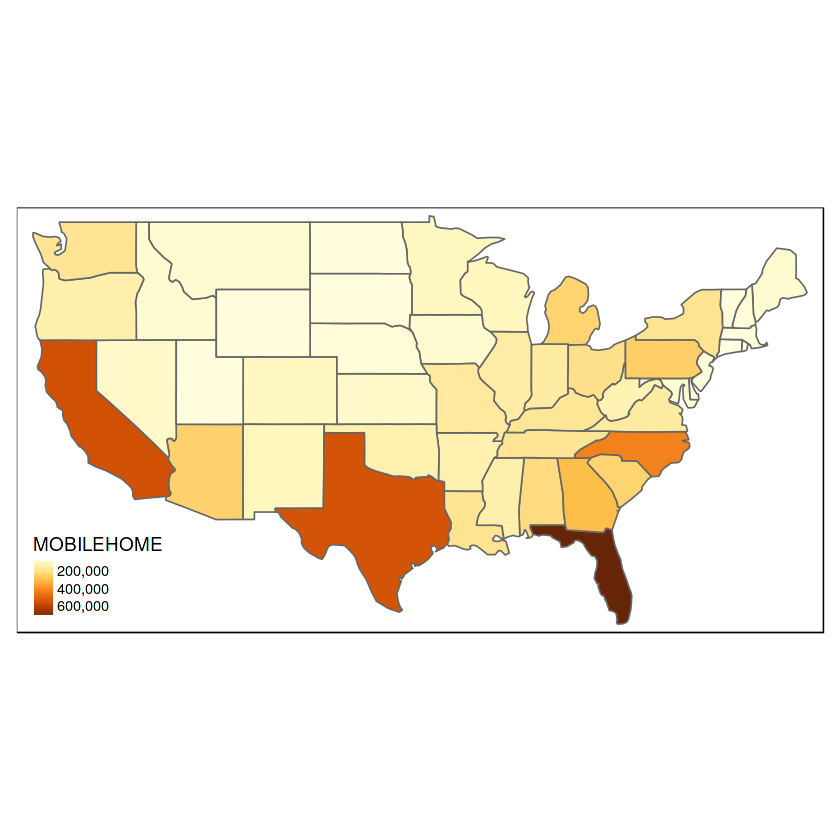

In [9]:
tm_shape(States_Census) +
  tm_fill(col = "MOBILEHOME", style = "cont", colorNA = NULL) + 
  tm_borders()